In [2]:
import pymc as pm
import arviz as az 
import scipy.stats as st 
import numpy as np

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.272,0.094,0.112,0.454,0.002,0.002,1635.0,2229.0,1.0


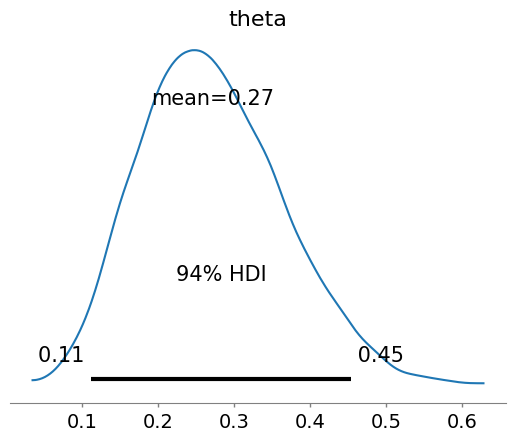

In [3]:
# MCMC mit Beta-Prior und Bernoulli-Likelihood

trials  = 20                # N        --> anzahl der Versuche
head    = 5                 # k, bzw z --> anzahl der Erfolge

data = np.zeros(trials)     # Vektor der Länge trials, wobei alle Komponenten 0 sind
data[np.arange(head)] = 1   # setzt die ersten headKomponenten auf 1

alph    = 1                 # parameter a der prior beta verteilung
bet     = 1                  # parameter b der prior beta verteilung

with pm.Model() as our_first_model:
    theta   = pm.Beta('theta', alpha=alph, beta=bet)    # prior verteilung als Beta-Verteilung
    y       = pm.Bernoulli('y', p=theta, observed=data) # likelihood 
    trace   = pm.sample(draws=1000, tune=1000)          # führt den MCMC-Algorithmus durch

pm.plot_posterior(trace)        # Posterior-Verteilungen für die vier chains darstellen
az.summary(trace)

In [ ]:
# MCMC mit Uniform-Prior und normal Likelihood
# --> wenn ungewissheit über die Verteilung
# Bsp: Abfüllen von Flaschen. Mindestens ist 0cl in der Flasche, maximal 80cl. (sollwert bei 70)

lower   = 0  # Untere Grenze
upper   = 80  # Obere Grenze
data    = np.array([71, 69, 67, 68, 73, 72, 71, 71, 68, 72, 69, 72]) # Gemessene Werte
sigma   = 1.5           # Standardabweichung (wenn gegeben)
# sigma   = data.std()    # Standardabweichung (schätzung aus den Daten)

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=lower, upper=upper)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace = pm.sample(1000)
az.plot_posterior(trace, point_estimate='mean', hdi_prob=0.94)
az.summary(trace)

In [ ]:
# einen rank plot pro chain
pm.plot_trace(trace, kind='rank_bars')

In [ ]:
# statistische Übersicht über die Posterior-Verteilung
az.summary(trace, kind='stats')

In [ ]:
# Posterior verteilung aufzeigen, achtung HDI default ist bei 0.94
# point_estimate='mode' --> gibt den Modus der Verteilung an
# point_estimate='mean' --> gibt den Mittelwert der Verteilung an
az.plot_posterior(trace, point_estimate='mode', hdi_prob=0.95)

In [ ]:
# Container für die Resultate der Bayes-Inferenz
# posterior     --> Posterior-Stichproben
# observed_data --> Beobachtete Daten
trace

In [ ]:
posterior = trace.posterior
posterior

In [ ]:
# den ersten draw aus chain 0 und 2 anzeigen
posterior.sel(draw=0, chain=[0,2])

In [ ]:
# die ersten 100 draws aus allen chains anzeigen
posterior.sel(draw=slice(0,100))

In [ ]:
# Mittelwert der Variable θ über alle drawsund chains berechnen
posterior.mean()

In [ ]:
# Mittelwerte für alle draws --> berechnet vier Werte für θ, jeweils einen pro chain
posterior.mean('draw')

In [ ]:
# alle Posterior Stichproben
az.extract(trace)

In [ ]:
# zufällige Stichproben aus der Posterior-Gruppe
az.extract(trace, num_samples=100)